#AULA 1 - IMPORTANDO DATASET E DATA ANALYSIS


##IMPORTANDO BIBLIOTECAS BÁSICAS

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


##IMPORTANDO O DATASET



In [ ]:
df = pd.read_excel('/content/drive/MyDrive/datasets exemplos colab/002-Dataset.xlsx')
df

In [ ]:
df.describe()


,u1,u2,u3,u4,u5,u6,u7,y
count,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000
mean,0.283894,0.667847,0.598467,0.435948,0.658086,0.620741,0.589397,0.267788
std,0.103143,0.057690,0.198581,0.138237,0.127054,0.165116,0.173251,0.158943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.224004,0.653819,0.500390,0.363369,0.608661,0.481804,0.445001,0.169188
50%,0.263995,0.671915,0.624269,0.396288,0.694644,0.639585,0.600959,0.246857
75%,0.325607,0.690943,0.742784,0.518144,0.730119,0.755050,0.741387,0.318061
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


os dados estão normalizados, pois o valor minimo é 0 e o valor máximo é igual a 1


##CRIANDO ALGUMAS FIGURAS

###Matriz de Correlacão


In [ ]:
df.corr()         #matriz de correlacao, vemos que U1 e Y tem uma correlacao de 68%

,u1,u2,u3,u4,u5,u6,u7,y
u1,1.000000,0.022282,0.185203,-0.285688,0.264961,-0.133458,-0.127381,0.068679
u2,0.022282,1.000000,0.294438,-0.014677,0.056326,0.055273,0.019423,-0.210909
u3,0.185203,0.294438,1.000000,-0.135633,-0.037202,-0.334736,-0.389827,-0.248085
u4,-0.285688,-0.014677,-0.135633,1.000000,0.140631,0.344408,0.344012,0.149349
u5,0.264961,0.056326,-0.037202,0.140631,1.000000,0.690699,0.702230,-0.210236
u6,-0.133458,0.055273,-0.334736,0.344408,0.690699,1.000000,0.988595,-0.064930
u7,-0.127381,0.019423,-0.389827,0.344012,0.702230,0.988595,1.000000,-0.043576
y,0.068679,-0.210909,-0.248085,0.149349,-0.210236,-0.064930,-0.043576,1.000000


###Correlation Matrix com heatmap


[Text(0.5, 1.0, 'Matriz de Correlação')]

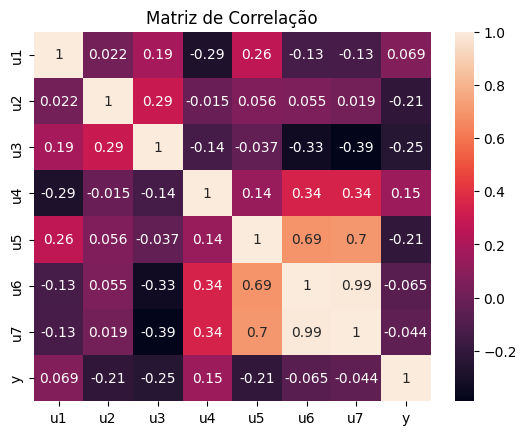

In [ ]:
hm = sns.heatmap(df.corr(), annot=True)  # faz um heatmap com o seaborn e coloca annot como true
hm.set(title='Matriz de Correlação') #seta um titulo

###Boxplot

<Axes: >

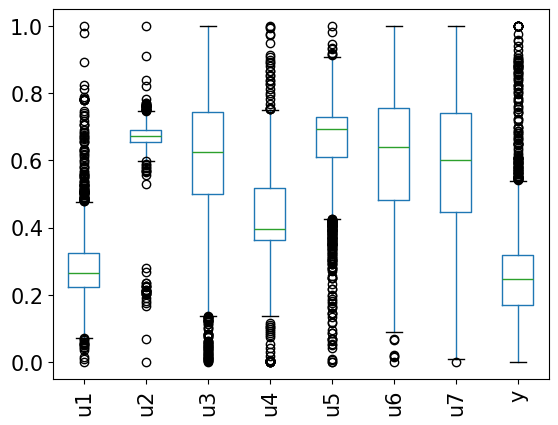

In [ ]:
df.boxplot(grid=False, rot = 90, fontsize=15)

A linha verde representa a mediana. O fundo da caixa representa o 1 quartil e o topo da caixa representa o 3 quartil. O tracinho preto represente o fundo ou o topo da caixa, respectivamente, multiplicado por 1,5. E os valores que estão alem do tracinho preto representados como bolinhas são os outliers.


###Pairplot

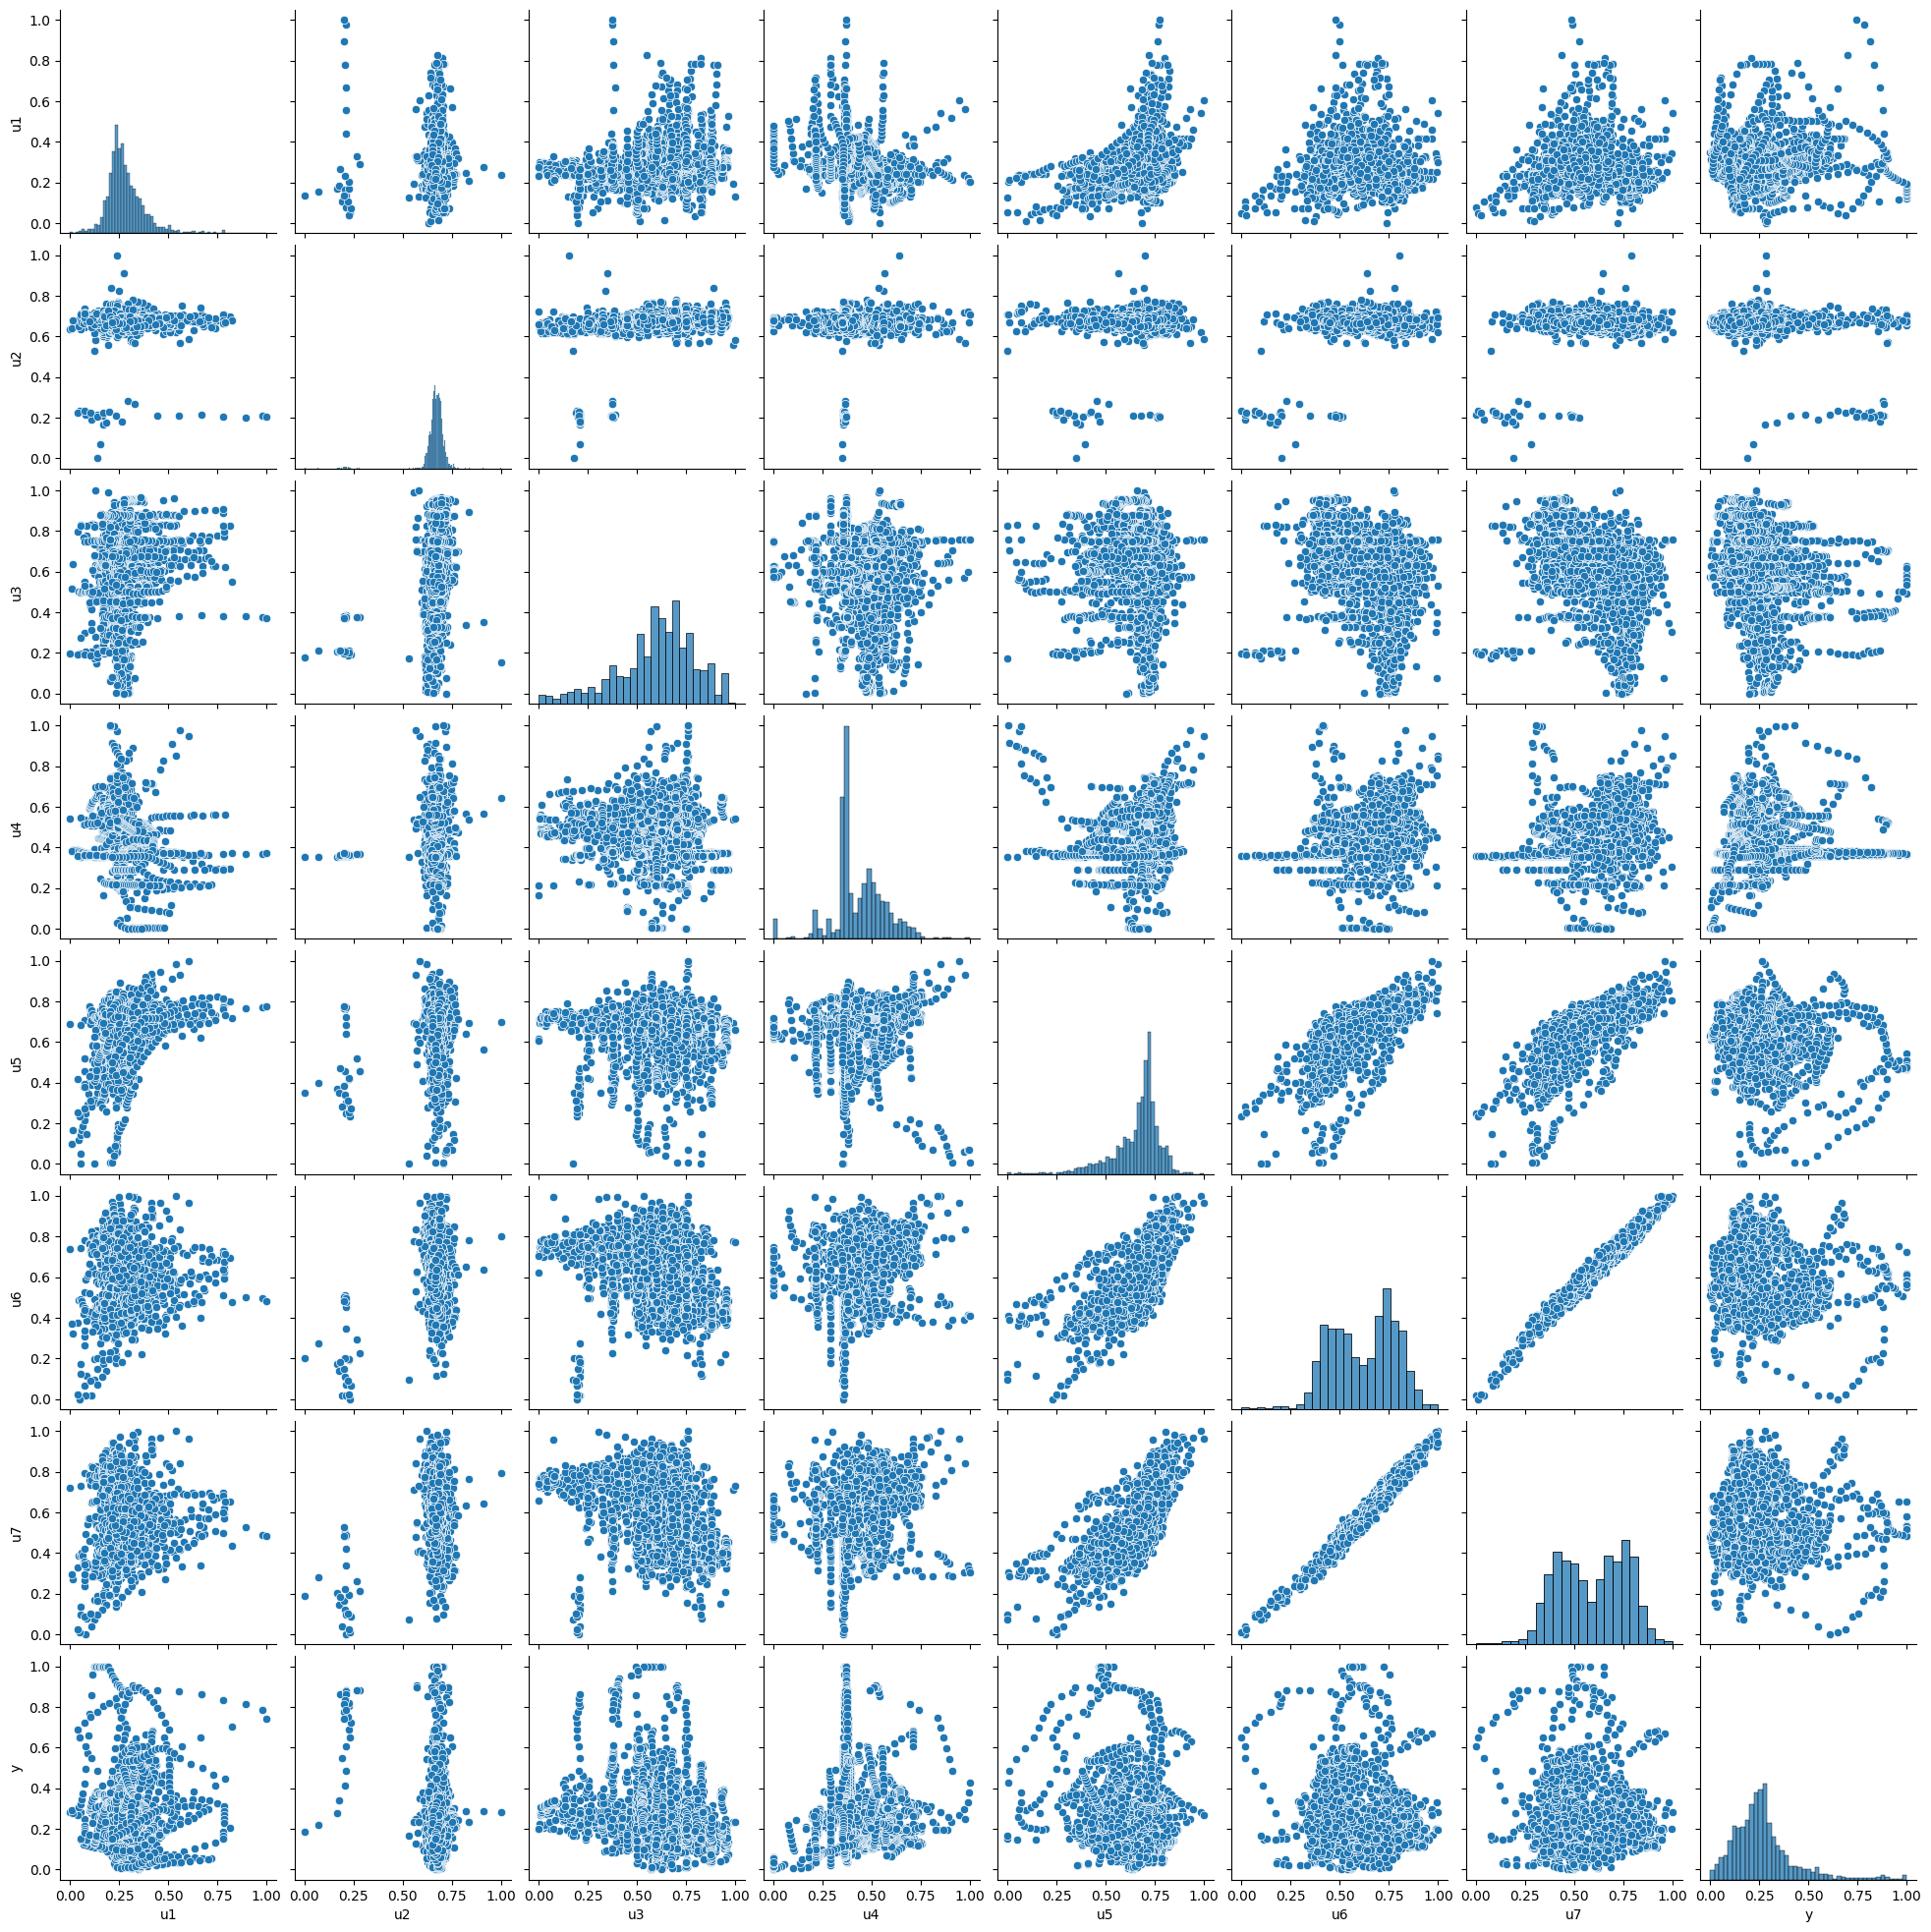

In [ ]:
sns.pairplot(df)

O gráfico está correlacionando atravaes de grafico ao inves de heatmap. Com a mesma variavel ele mostra um histograma.

###Parallel Cordinates Plot

In [ ]:
column_names = list(df)
column_names[-1]


'y'

In [ ]:
px.parallel_coordinates(df, color = column_names[-1], dimensions = column_names[0:6], title="Parallel Cordinates Plot")


O grafico usa a variavel Y ou dependente para plotar as cores de relacao. E usa como dimensão os valores das variaveis independentes. Clicando na linha vertical e selecionando valores, conseguimos ver a correlacao com as outras variaveis.

#AULA 2 - REMOVENDO OUTLIERS

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/datasets exemplos colab/003-Dataset.xlsx")
df.boxplot(grid = False)

##Remove Outliers

In [ ]:
column_names2 = list(df) #foi chamado de column_names2 para nao misturar com a primeira aula


for names in column_names2[1:]:                  #para cada coluna
  for x in [names]:                              #analise cada linha
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75 - q25                           #aqui está calculando a caixa

    max = q75 + (1.5 * intr_qr)               #aqui está calculando as linhas de máximo e mínimo
    min = q25 - (1.5 * intr_qr)
    df.loc[df[x] < min, x] = np.nan            #substituindo os valores outliers pelo not a number
    df.loc[df[x] > max, x] = np.nan
df.isnull().sum()                      #para saber quais valores por coluna foram substituidos

,0
u1,0
u2,33
u3,43
u4,68
u5,77
u6,0
u7,0
y,48


In [ ]:
df = df.dropna(axis = 0)    #dataframe vai ser o mesmo dataframe, dropando os valores not a number do axis = 0, ou seja, excluindo a linha.
df.isnull().sum()

,0
u1,0
u2,0
u3,0
u4,0
u5,0
u6,0
u7,0
y,0


In [ ]:
df.describe()

,u1,u2,u3,u4,u5,u6,u7,y
count,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000
mean,0.283356,0.671760,0.634514,0.443227,0.689478,0.638906,0.607384,0.232318
std,0.098828,0.026647,0.171204,0.116308,0.077037,0.155542,0.163646,0.097475
min,0.000000,0.600200,0.192462,0.135752,0.486126,0.181461,0.149532,0.007825
25%,0.222130,0.653113,0.528525,0.363887,0.648395,0.494312,0.460998,0.157796
50%,0.259718,0.670944,0.654103,0.419326,0.703951,0.672468,0.632856,0.233776
75%,0.322771,0.691116,0.750118,0.522091,0.735483,0.769060,0.752813,0.287785
max,0.812926,0.744321,0.965611,0.755755,0.874464,0.995237,0.994777,0.493426


os dados não estão mais normalizados já que o valor min deixou de ser 0 e o valor máximo deixou de ser 1


#AULA 03 - DATA STANDARIZATION VS NORMALIZATION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/datasets exemplos colab/004-Dataset(a).xlsx")
df.describe()

,X1,X2,Y
count,500.000000,500.000000,500.000000
mean,50.164000,50.128000,155.562000
std,29.244411,28.529133,64.567423
min,0.000000,0.000000,2.000000
25%,25.000000,26.000000,105.000000
50%,50.500000,53.000000,157.000000
75%,75.000000,73.000000,207.000000
max,100.000000,100.000000,292.000000


<Axes: ylabel='Density'>

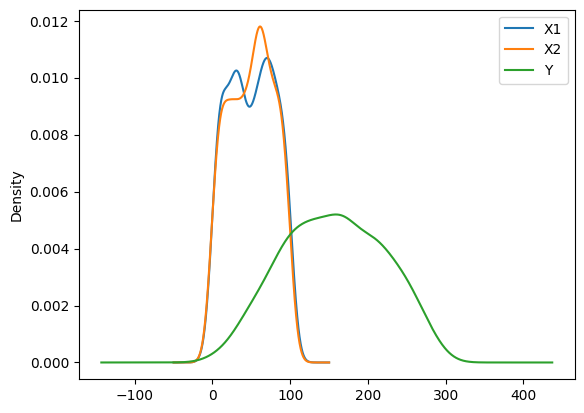

In [ ]:
df.plot.kde()

In [ ]:
min_value = df.min()
max_value = df.max()
std_value = df.std()
mean_value = df.mean()
df_norm = (df - min_value) / (max_value - min_value)
df_norm.describe()

##Data Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(df)                  #calcula a média e o desvio padrao dos dados ä serem inseridos
scaler.transform(df)            #aqui é aplicada a formula juntamente com o desvio padrao e a média calculados anteriormente

array([[ 0.67896275, -0.84657897, -0.45830552],
       [ 1.08970852,  1.22355363,  1.63462613],
       [ 0.74742038, -1.37288387, -0.83038226],
       ...,
       [-0.45058811, -1.12727492, -1.24896859],
       [-1.44322371, -0.32027407, -0.95440784],
       [ 0.81587801, -1.2325359 , -0.70635668]])

In [ ]:
scalerdata = pd.DataFrame(data = scaler.transform(df)).  #transformando a array acima em um dataframe
scalerdata.columns = ["x1","x2","y"]                        #inserindo nomes nas colunas
scalerdata

,x1,x2,y
0,0.678963,-0.846579,-0.458306
1,1.089709,1.223554,1.634626
2,0.747420,-1.372884,-0.830382
3,-1.717054,0.206031,-0.675350
4,-0.792876,1.328815,0.874969
...,...,...,...
495,1.671598,1.363902,1.975696
496,1.192395,-0.671144,-0.039719
497,-0.450588,-1.127275,-1.248969
498,-1.443224,-0.320274,-0.954408


In [ ]:
scalerdata.describe()                   #agora os dados estao normalizados pois estamos centrados com a média (mean) em zero e o desvio padrao (std) esta em 1

,x1,x2,y
count,5.000000e+02,5.000000e+02,5.000000e+02
mean,-6.217249e-17,-1.776357e-18,-1.705303e-16
std,1.001002e+00,1.001002e+00,1.001002e+00
min,-1.717054e+00,-1.758841e+00,-2.380702e+00
25%,-8.613339e-01,-8.465790e-01,-7.838727e-01
50%,1.150088e-02,1.007698e-01,2.229360e-02
75%,8.501068e-01,8.025097e-01,7.974535e-01
max,1.705827e+00,1.749859e+00,2.115225e+00


<Axes: ylabel='Density'>

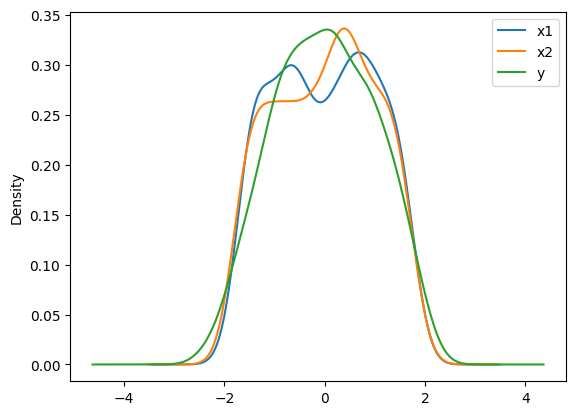

In [ ]:
scalerdata.plot.kde()           #todos centrados em zero e nromalizados.

# AULA 04 - SIMPLE LINEAR REGRESSION



FOI UTILIZADA UMA VARIAVEL PARA PREDIZER UMA SEGUNDA

### Importing the libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing Dataset

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/datasets exemplos colab/005-Dataset.xlsx')
X = df.iloc[:, :-1].values          #criando um dtframe selecionando todos os valores de linha e todas as colunas excluindo a última
y = df.iloc[:, -1].values           #criando um dtframe seleciona todos os valores de linha e somente a ultima coluna (variavel dependente)

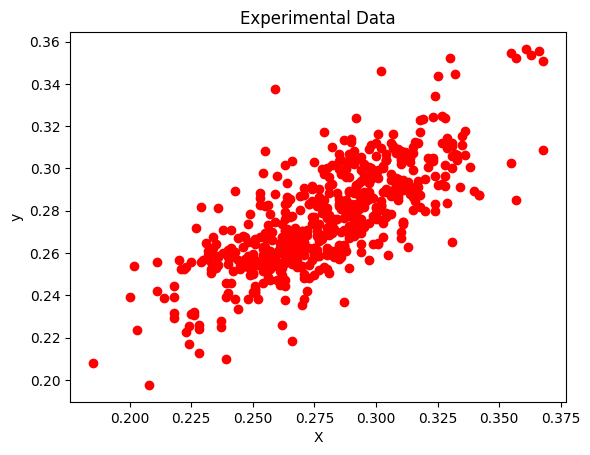

In [ ]:
plt.scatter(X, y, color = 'red')
plt.title('Experimental Data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Regression Fit

In [ ]:
from sklearn.linear_model import LinearRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
regressor = LinearRegression()          #atribui ao regressor para facilitar a aplicacao das funcoes
regressor.fit(X, y)                     #aplica a regressão linear aos dados e ao executar, ele treina

LinearRegression()

In [ ]:
regressor.score(X, y)

0.5686114997914065

## Plot Regression

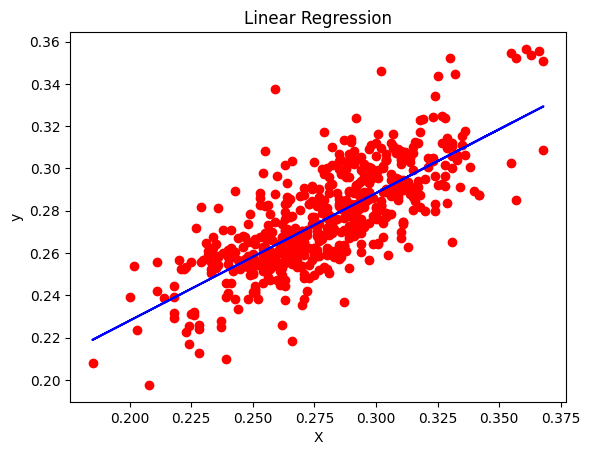

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue').  #plotando a linha de regressão, usando a funcao predict nas variaveis X
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Making a single prediction

In [ ]:
regressor.predict([[0.3]])    #se o X for 0.3 o valor predito seria 0.2883

array([0.28834545])

In [ ]:
print(regressor.coef_)                      #coeficiente angular
print(regressor.intercept_)                 #coeficiente linear

[0.60333217]
0.10734579841018793


# AULA 05 - MULTIPLE LINEAR REGRESSION


FORAM UTILIZADAS DUAS VARIAVEIS PARA PREDIZER A TERCEIRA

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing Dataset

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/datasets exemplos colab/006-Dataset.xlsx')

In [ ]:
df.describe()

,Idade,Anos_de_Estudo,Salario
count,500.000000,500.000000,500.000000
mean,43.836000,5.460000,59.788000
std,16.188553,2.855294,17.631472
min,18.000000,1.000000,24.000000
25%,29.000000,3.000000,46.000000
50%,43.000000,6.000000,59.000000
75%,59.250000,8.000000,74.000000
max,70.000000,10.000000,100.000000


In [ ]:
df = df.dropna()

In [ ]:
df.dtypes

,0
Idade,int64
Anos_de_Estudo,int64
Salario,int64


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Splitting the dataset into the Training set and Test set

SEPARAR DADOS PARA TREINAR O MODELO E DADOS PARA TESTAR O MODELO

In [ ]:
from sklearn.model_selection import train_test_split    #essa biblioteca separa automaticamente dados de treino e dados de teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)   #cria 4 vetores e associa eles


### Regression Fit

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.score(X_test, y_test)         #saber o Rquadrado do teste executado

0.969743992546611

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[0.99153223 2.06515656]
4.897111235790476


## Plot Regression

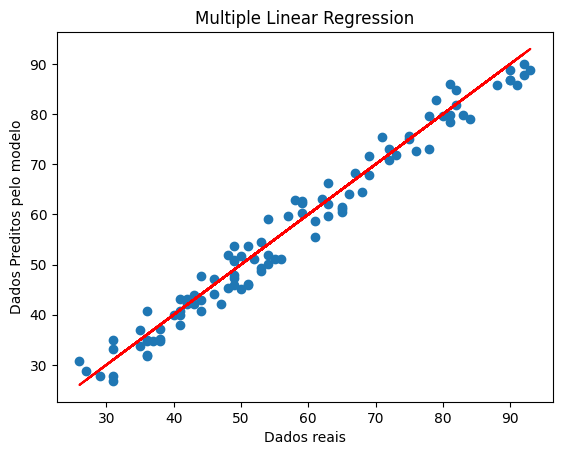

In [ ]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test, y_pred)             #grafico que relaciona o y de teste ou seja os valores reais e o y predito pelo modelo
plt.title('Multiple Linear Regression')
plt.xlabel('Dados reais')
plt.ylabel('Dados Preditos pelo modelo')
plt.plot(y_test,y_test,c='r')           #c='r'. color igual a red
plt.show()

In [ ]:
regressor.predict([[25,5]])         #o salário de uma pessoa de 25 anos com 5 anos de estudo

array([40.01119975])

# AULA 06 - POLYNOMIAL REGRESSION


### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing Dataset

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/datasets exemplos colab/007-Dataset.xlsx')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
df

,X,y
0,-10,-152.0
1,-9,-105.0
2,-8,-70.0
3,-7,-36.5
4,-6,-27.0
5,-5,-17.0
6,-4,-4.0
7,-3,5.5
8,-2,12.0
9,-1,-2.0


In [ ]:
df.describe()

,X,y
count,21.000000,21.000000
mean,0.000000,26.880952
std,6.204837,105.966493
min,-10.000000,-152.000000
25%,-5.000000,-17.000000
50%,0.000000,0.000000
75%,5.000000,37.500000
max,10.000000,311.000000


### Training the Polynomial Regression model on the whole dataset


In [ ]:
from sklearn.preprocessing import PolynomialFeatures        #PRÉ PROCESSAMENTO POLINOMIAL
from sklearn.linear_model import LinearRegression

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [ ]:
poly_reg = PolynomialFeatures(degree = 3)           #PEDE DE PARAMETRO O GRAU DO POLINOMIO A SER GERADO
X_poly = poly_reg.fit_transform(X)                 #DEGREE = 2 GERA 3 COLUNAS A PRIMEIRA ELEVA A 0, A SEGUNDA ELEVA A 1 E A TERCEIRA A 2

In [ ]:
print(X_poly)

[[    1.   -10.   100. -1000.]
 [    1.    -9.    81.  -729.]
 [    1.    -8.    64.  -512.]
 [    1.    -7.    49.  -343.]
 [    1.    -6.    36.  -216.]
 [    1.    -5.    25.  -125.]
 [    1.    -4.    16.   -64.]
 [    1.    -3.     9.   -27.]
 [    1.    -2.     4.    -8.]
 [    1.    -1.     1.    -1.]
 [    1.     0.     0.     0.]
 [    1.     1.     1.     1.]
 [    1.     2.     4.     8.]
 [    1.     3.     9.    27.]
 [    1.     4.    16.    64.]
 [    1.     5.    25.   125.]
 [    1.     6.    36.   216.]
 [    1.     7.    49.   343.]
 [    1.     8.    64.   512.]
 [    1.     9.    81.   729.]
 [    1.    10.   100.  1000.]]


In [ ]:
regressor = LinearRegression()
regressor.fit(X_poly, y)

LinearRegression()

In [ ]:
regressor.score(X_poly, y)

0.997421137399221

In [ ]:
y_pred = regressor.predict(poly_reg.fit_transform(X))           #FAZENDO UMA COMPARACAO ENTRE Y REAIS E PREDIZIDOS
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y.reshape(len(y),1)),1))

[[-155.19 -152.  ]
 [-105.75 -105.  ]
 [ -67.77  -70.  ]
 [ -39.8   -36.5 ]
 [ -20.39  -27.  ]
 [  -8.09  -17.  ]
 [  -1.45   -4.  ]
 [   0.98    5.5 ]
 [   0.66   12.  ]
 [  -0.96   -2.  ]
 [  -2.44    0.  ]
 [  -2.31   -0.5 ]
 [   0.86   -4.  ]
 [   8.54   13.  ]
 [  22.16   24.  ]
 [  43.2    37.5 ]
 [  73.09   68.  ]
 [ 113.28  118.  ]
 [ 165.24  156.  ]
 [ 230.4   237.5 ]
 [ 310.23  311.  ]]


In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[ 0.   -0.92  0.8   0.24]
-2.436090225563863


In [ ]:
print(regressor.predict(poly_reg.fit_transform([[8]])))

[165.24]


## Plot Regression

<ipython-input-46-d0ab9eacca21>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


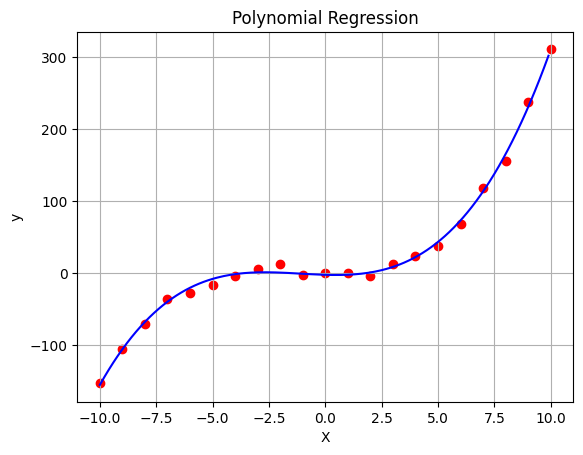

In [ ]:
plt.scatter(X, y, color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, regressor.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.grid(True)
plt.show()